### A temporary notebook to look closely to bayes integration and possible pitfalls

In [2]:
import init_paths
import numpy as np
import pandas as pd
import seaborn as sns
import cortico_cereb_connectivity.cio as cio
import cortico_cereb_connectivity.globals as gl
import cortico_cereb_connectivity.run_model as rm
import Functional_Fusion.dataset as fdata
import Functional_Fusion.atlas_map as at
import matplotlib.pyplot as plt
import cortico_cereb_connectivity.evaluation as ev
import matplotlib.pyplot as plt
from scipy import stats
import SUITPy as suit

In [3]:
def plot_cereb_data(data,cereb_atlas,cscale=[-0.1,0.1]):
    # Transform the data to a nifti image
    nifti_img = cereb_atlas.data_to_nifti(data)
    # Map to the cerebellar flatmap 
    flat_data = suit.flatmap.vol_to_surf(nifti_img)
    # Plot 
    suit.flatmap.plot(flat_data,new_figure=False,cscale=cscale)

In [3]:
config = rm.get_eval_config(eval_dataset='MDTB', eval_ses='all', cerebellum='MNISymC3', model='ind')
dataset = fdata.get_dataset_class(gl.base_dir, dataset="MDTB")
config["subj_list"] = dataset.get_participants().participant_id
config["subj_list"] = config["subj_list"][:5]

dirname = f"MDTB_all_Icosahedron1002_L2reghalf"
mname = f"MDTB_all_Icosahedron1002_L2reghalf_A8"
fitted_models,train_infos = rm.get_fitted_models([dirname],[mname],config)
fm_reghalf = fitted_models[0]

dirname = f"MDTB_all_Icosahedron1002_L2reg"
mname = f"MDTB_all_Icosahedron1002_L2reg_A8"
fitted_models,train_infos = rm.get_fitted_models([dirname],[mname],config)
fm_reg = fitted_models[0]

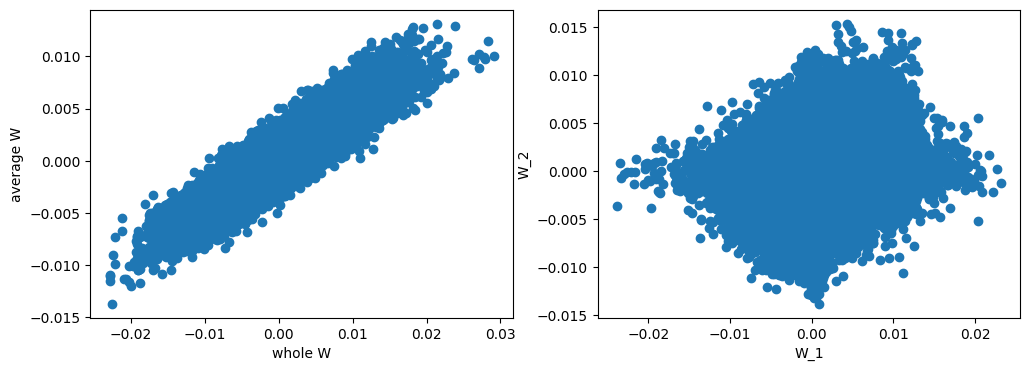

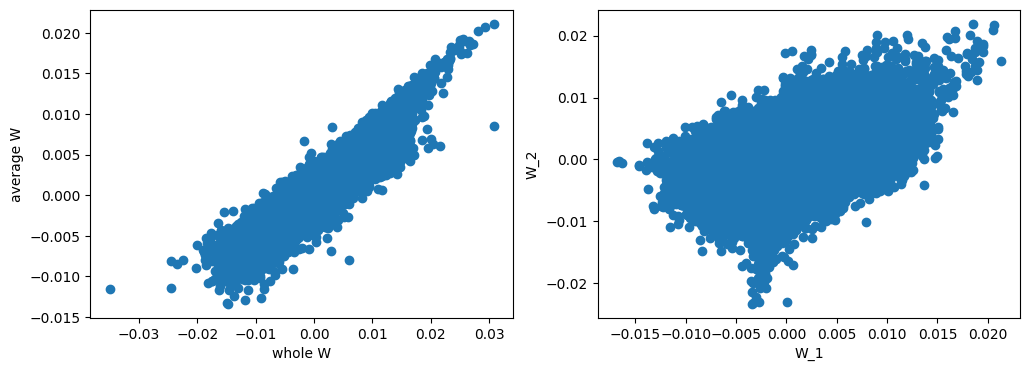

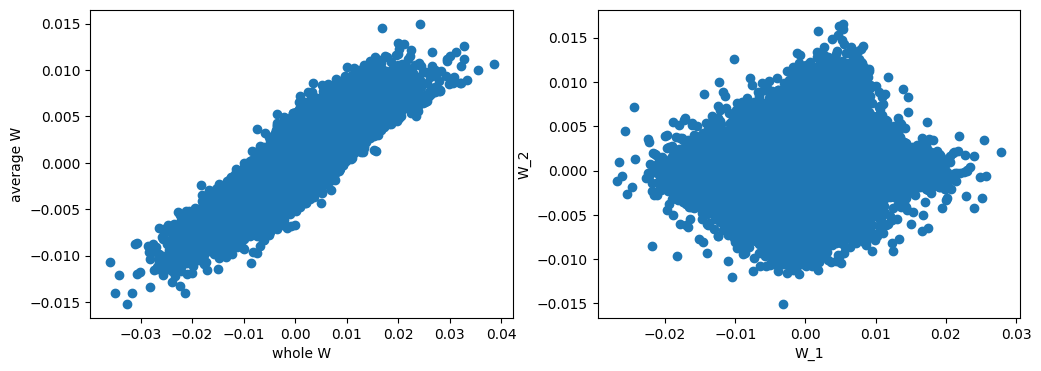

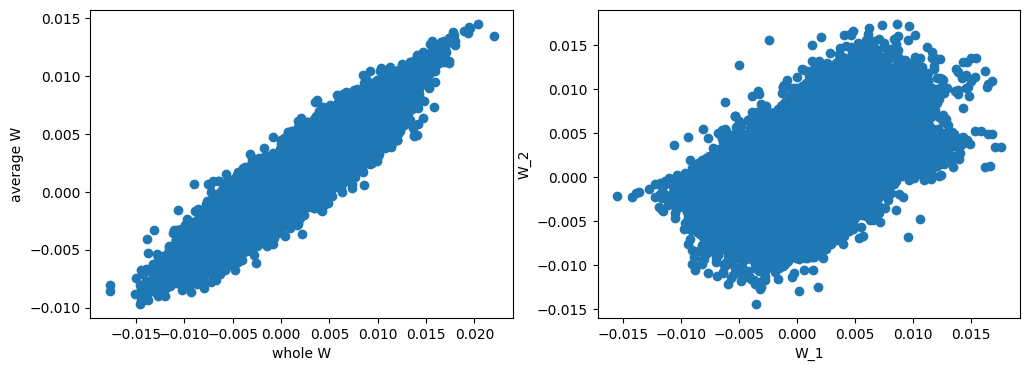

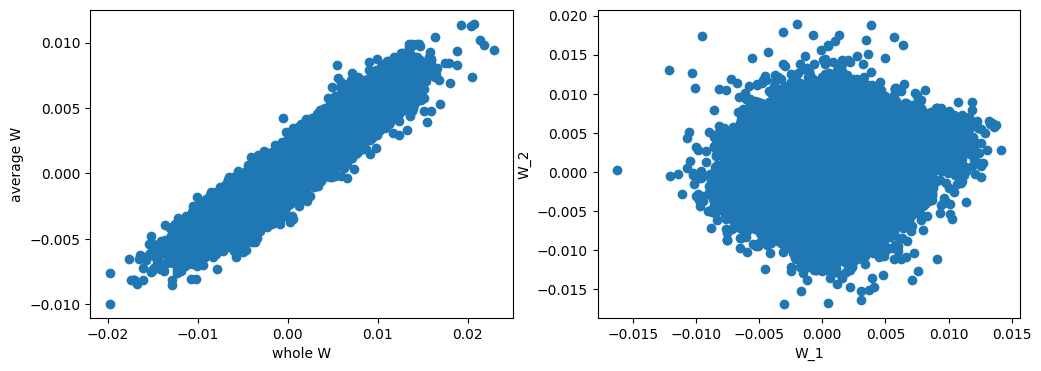

In [5]:
for s in range(len(config['subj_list'])):
    plt.subplots(1,2,figsize=(12,4))
    plt.subplot(1,2,1)
    plt.scatter(fm_reg[s].coef_.flatten(), fm_reghalf[s].coef_.flatten())
    plt.xlabel('whole W')
    plt.ylabel('average W')

    plt.subplot(1,2,2)
    plt.scatter(fm_reghalf[s].coef_1.flatten(), fm_reghalf[s].coef_2.flatten())
    plt.xlabel('W_1')
    plt.ylabel('W_2')
    plt.show()